<a href="https://colab.research.google.com/github/mtalibfarooq/Machine_Learning_Diabetes_Dataset/blob/main/ML_Algorithm(diabetes)_(Shoaib_MTalib_Aashir).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [50]:
def extract(src):
    df = pd.read_csv(src)
    print(f"Rows: {df.shape[0]},\tColumns: {df.shape[1]}")

    df = df.rename(columns=lambda x: x.replace(" ", ""))
    return df

In [62]:
data = extract("/content/diabetes.csv")
data.head()

Rows: 768,	Columns: 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Target/Label/Outcome Visualization of No of Diabetes patients

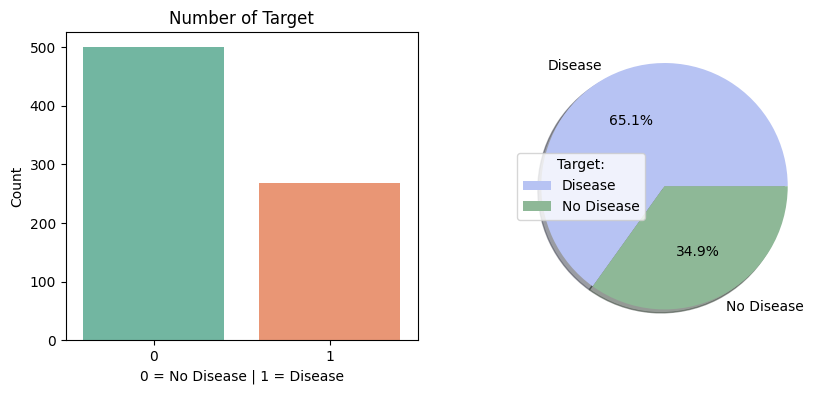

In [53]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x="Outcome", data=data, palette="Set2")
plt.title("Number of Target")
plt.xlabel("0 = No Disease | 1 = Disease")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
target_counts = data['Outcome'].value_counts()
plt.pie(target_counts.values, labels=["Disease", "No Disease"], shadow=True, autopct="%1.1f%%", colors=["#B7C3F3", "#8EB897"])
plt.legend(title="Target:")

plt.show()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


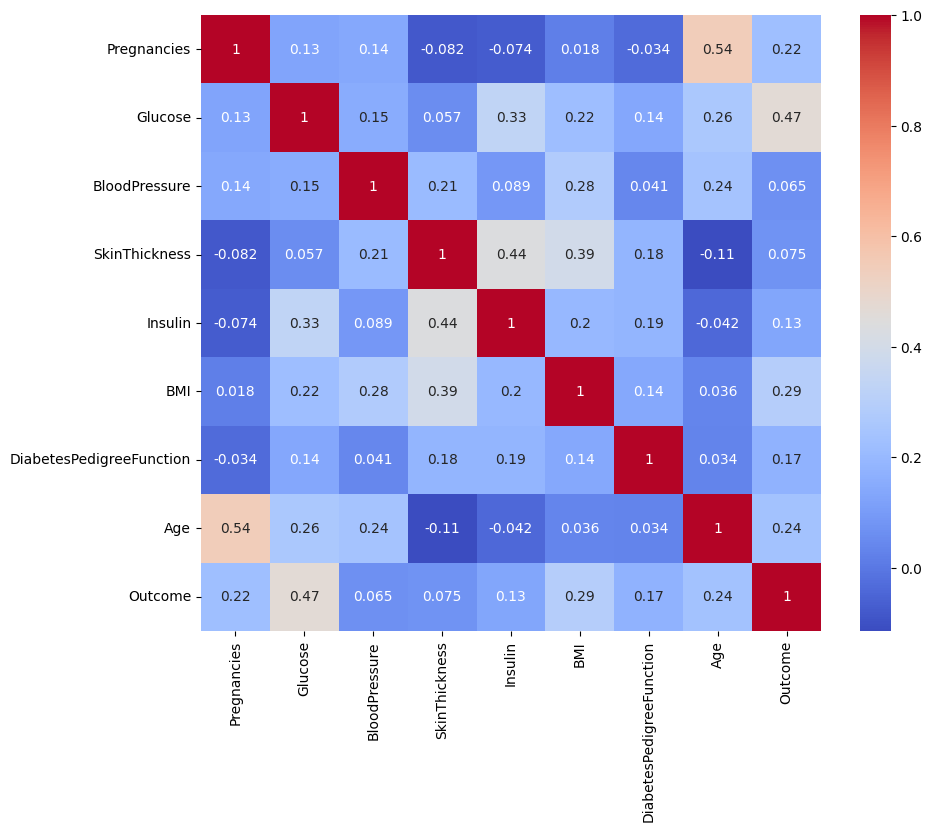

In [55]:
# Get the correlation matrix as a Pandas DataFrame
correlation_matrix = data.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Number of Instances: 768
Number of Attributes: 8 plus target/class
For Each Attribute: (all numeric-valued)

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

In [63]:
#Feature Selection
x = data.drop(['SkinThickness','BloodPressure','Outcome'],axis=1)

x.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [64]:
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [68]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=20)

In [69]:
xtrain.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
446,1,100,70,25.3,0.658,28
260,3,191,130,30.9,0.299,34
570,3,78,0,32.5,0.270,39
590,11,111,0,46.8,0.925,45
30,5,109,0,36.0,0.546,60


In [70]:
ytrain.head()

446    0
260    0
570    0
590    1
30     0
Name: Outcome, dtype: int64

In [71]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [72]:
predictions = model.predict(xtest)

In [73]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [74]:
ytest.head()

143    1
14     1
504    0
557    0
736    0
Name: Outcome, dtype: int64

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [76]:
acc = accuracy_score(predictions,ytest)
cm = confusion_matrix(predictions,ytest)

In [77]:
acc

0.7727272727272727

In [78]:
cm

array([[91, 25],
       [10, 28]])

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       101
           1       0.74      0.53      0.62        53

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



# Decision Tree classifier

In [82]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
#Feature Selection
x = data.drop(['SkinThickness','BloodPressure','Outcome'],axis=1)

x.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [84]:
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [93]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=20)

In [94]:
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [95]:
pre = model.predict(xtest)

In [96]:
ass=accuracy_score(pre,ytest)
ass
cm = confusion_matrix(pre,ytest)
print(classification_report(ytest,pre))
ass
cm

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       101
           1       0.49      0.62      0.55        53

    accuracy                           0.65       154
   macro avg       0.63      0.64      0.63       154
weighted avg       0.67      0.65      0.66       154



array([[67, 20],
       [34, 33]])

# Random Forest classifier

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [98]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
#Feature Selection
x = data.drop(['SkinThickness','BloodPressure','Outcome'],axis=1)

x.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [100]:
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [101]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [102]:
model = RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [103]:
pr = model.predict(xtest)

In [104]:
ass = accuracy_score(ytest,pr)
ass
cm = confusion_matrix(pr,ytest)
cm
print(classification_report(ytest,pr))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        94
           1       0.73      0.58      0.65        60

    accuracy                           0.75       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



# KNN Algorithm

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import classification_report

In [107]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
#Feature Selection
x = data.drop(['SkinThickness','BloodPressure','Outcome'],axis=1)

x.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [109]:
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [110]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

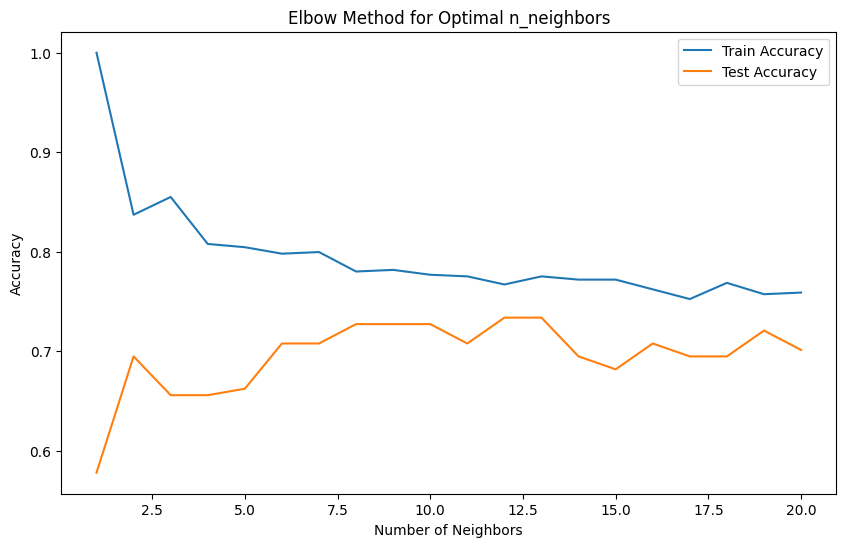

In [116]:
import numpy as np

# Calculate accuracy for different values of n_neighbors
neighbors = np.arange(1, 21)  # Test n_neighbors from 1 to 20
train_accuracy = []
test_accuracy = []

for n in neighbors:
    mdl = KNeighborsClassifier(n_neighbors=n)
    mdl.fit(xtrain, ytrain)
    train_accuracy.append(mdl.score(xtrain, ytrain))
    test_accuracy.append(mdl.score(xtest, ytest))

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracy, label="Train Accuracy")
plt.plot(neighbors, test_accuracy, label="Test Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Elbow Method for Optimal n_neighbors")
plt.legend()
plt.show()


In [117]:
mdl = KNeighborsClassifier(n_neighbors=3,p=2,metric='euclidean')
mdl.fit(xtrain,ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [118]:
prediction = mdl.predict(xtest)

In [119]:
print(accuracy_score(ytest,prediction))
print(confusion_matrix(ytest,prediction))
print(f1_score(ytest,prediction))
print(classification_report(ytest,prediction))

0.6558441558441559
[[78 25]
 [28 23]]
0.46464646464646464
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       103
           1       0.48      0.45      0.46        51

    accuracy                           0.66       154
   macro avg       0.61      0.60      0.61       154
weighted avg       0.65      0.66      0.65       154

